## Exploratory Data Analysis
## (EDA) 및 데이터전처리

###
Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)

Name - 탑승객 성명

Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

Sex - 성별

Age - 나이(세)

SibSp - 함께 탑승한 형제자매, 배우자 수 총합

Parch - 함께 탑승한 부모, 자녀 수 총합

Embarked - 탑승 항구

Fare - 탑승 요금

Ticket - 티켓 넘버

Cabin - 객실 넘버
###

### 데이터 전처리

In [46]:
import pandas as pd

titanic_df = pd.read_csv("titanic.csv")

In [47]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [48]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Target Variable

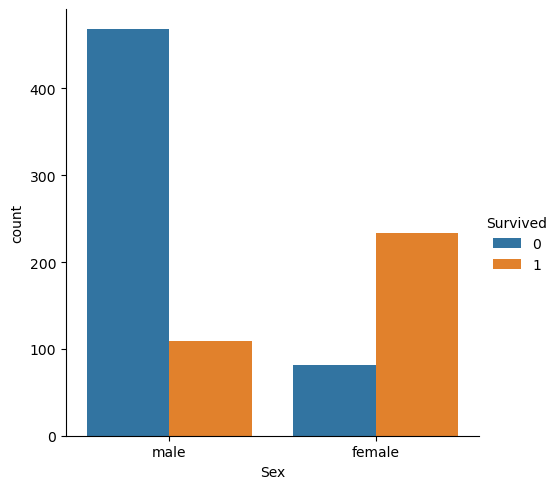

In [49]:
import seaborn as sns

titanic_df['Survived'] = titanic_df['Survived'].astype(str)

sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic_df)

### drop()

In [50]:
df = titanic_df[:]

df.drop(columns='Name', inplace=True)
df.head(5)

/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_61948/4156009177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Name', inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.drop(columns=['Cabin', 'Ticket', 'Embarked'], inplace=True)
df.head(5)

/var/folders/8l/dq9nhgmx5gj01xrwhwzb41s40000gn/T/ipykernel_61948/3338000983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cabin', 'Ticket', 'Embarked'], inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


### 중복 데이터 처리

In [52]:
titanic_df.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### duplicated()

In [53]:
titanic_df[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### drop_duplicates()

In [54]:
titanic_df.drop_duplicates(inplace = True)
titanic_df[titanic_df.duplicated()]
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 누락된 값 다루기

In [55]:
titanic_df.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


<Axes: >

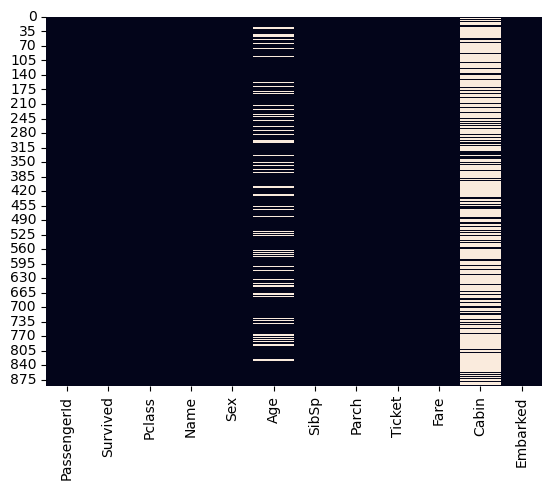

In [56]:
import seaborn as sns
sns.heatmap(titanic_df.isnull(), cbar=False)

In [57]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터 대체

In [58]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Null 값 제거

In [62]:
titanic_df.dropna(inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Null 값 제거

In [63]:
titanic_df.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### 데이터 변화 columns

In [64]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### rename()

In [66]:
titanic_df.rename(columns={
'SibSp': 'Sibling.Spouse',
}, inplace=True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'Sibling.Spouse', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data encoding

In [67]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibling.Spouse,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C


### replace()

In [74]:
titanic_df.head(10)
titanic_df.replace({'Sex': {'male': 0}}, inplace = True)
titanic_df.replace({'Sex': {'female': 1}}, inplace = True)

In [71]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibling.Spouse,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.000000,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.000000,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",0,34.000000,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.000000,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,29.699118,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.000000,1,0,PC 17572,76.7292,D33,C


### 데이터 정규화 - 이상 값 처리



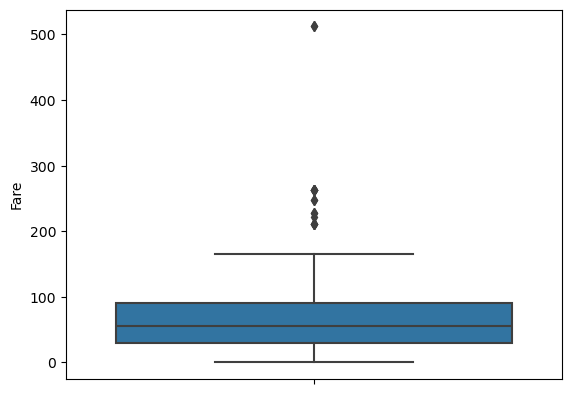

In [76]:
sns.boxplot(y = titanic_df['Fare'] );

In [83]:
titanic_df.describe()

,PassengerId,Pclass,Sex,Age,Sibling.Spouse,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,1.198020,0.470297,35.112392,0.445545,0.440594,76.103301
std,249.704228,0.528205,0.500357,14.988475,0.630490,0.732294,74.759941
min,2.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,263.250000,1.000000,0.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,0.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,3.000000,1.000000,80.000000,3.000000,4.000000,512.329200


### 이상 값 처리

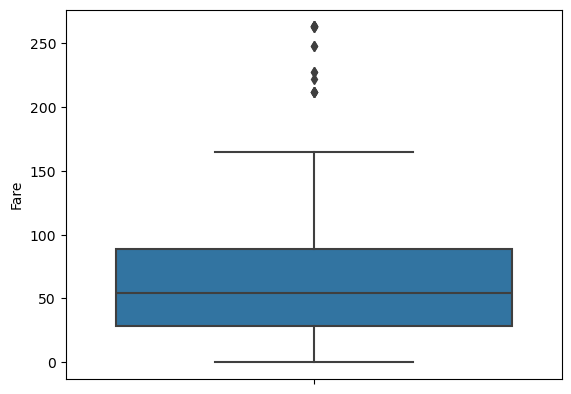

In [84]:
titanic_df.drop(titanic_df[titanic_df.Fare >= 500].index,
inplace = True)
sns.boxplot(y = titanic_df['Fare'] );

### Min-max 정규화

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
titanic_df[['Fare']] = scaler.fit_transform(titanic_df[['Fare']])
titanic_df.describe()

,PassengerId,Pclass,Sex,Age,Sibling.Spouse,Parch,Fare
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,452.960000,1.200000,0.475000,35.108516,0.450000,0.440000,0.272780
std,249.635872,0.530478,0.500628,15.063472,0.632058,0.734231,0.231708
min,2.000000,1.000000,0.000000,0.920000,0.000000,0.000000,0.000000
25%,261.750000,1.000000,0.000000,25.000000,0.000000,0.000000,0.108971
50%,455.500000,1.000000,0.000000,33.000000,0.000000,0.000000,0.205513
75%,674.500000,1.000000,1.000000,47.000000,1.000000,1.000000,0.338799
max,890.000000,3.000000,1.000000,80.000000,3.000000,4.000000,1.000000


### Correlation

<Axes: >

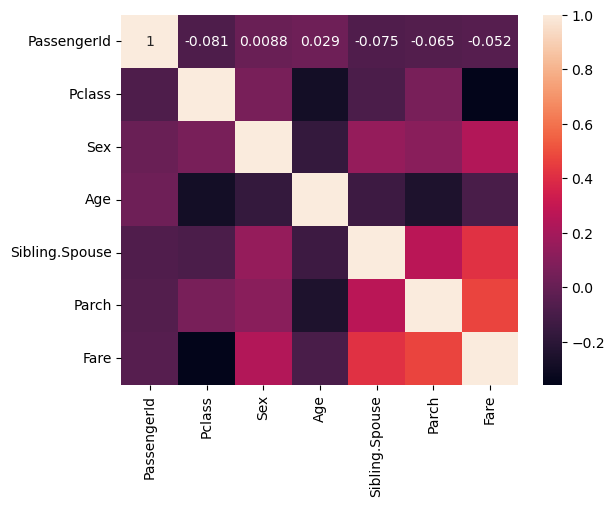

In [91]:
sns.heatmap(titanic_df.corr(), annot=True)